# Customer Segmentation with K-means
 




# Task
Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.
Dataset :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


# Importing Libraries.

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

# Data Exploration

In [82]:
df = pd.read_csv('Mall_Customers.csv')



In [83]:
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [84]:
df.shape

(200, 5)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [17]:
df.describe(include='object')

Gender
count      200
unique       2
top     Female
freq       112

In [18]:

df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Data Cleaning and Handling Missing Data


In [19]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
df.isna().sum().sort_values(ascending=False)/len(data)*100


CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [21]:
df.duplicated().sum()


0

In [22]:
#Checking Unique data

In [23]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [85]:
def attribute_info(df_feature):
 
 print('Description of feature: ', '\n')
 print(df_feature.describe(), '\n')
 
 print('Value Counts of feature: ', '\n')
 print(df_feature.value_counts(), '\n')
 
 print('Unique Values of feature: ', '\n')
 print(df_feature.unique(), '\n')
 
 print('Missing Values of feature: ', '\n')
 print(df_feature.isna().sum(), '\n')
 
 print('Missing Values of feature in %: ', '\n')
 print(df_feature.isna().sum()/len(df_feature)*100, '\n')

for col in df:
 print('\033[1m' + 'Attribute_Name: ', col+'\033[0m')
 attribute_info(df[col])
 print('---------------------------------------------------------------')


Attribute_Name:  CustomerID
Description of feature:  

count    200.000000
mean     100.500000
std       57.879185
min        1.000000
25%       50.750000
50%      100.500000
75%      150.250000
max      200.000000
Name: CustomerID, dtype: float64 

Value Counts of feature:  

CustomerID
1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: count, Length: 200, dtype: int64 

Unique Values of feature:  

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 13

In [25]:
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

# Data Visualization

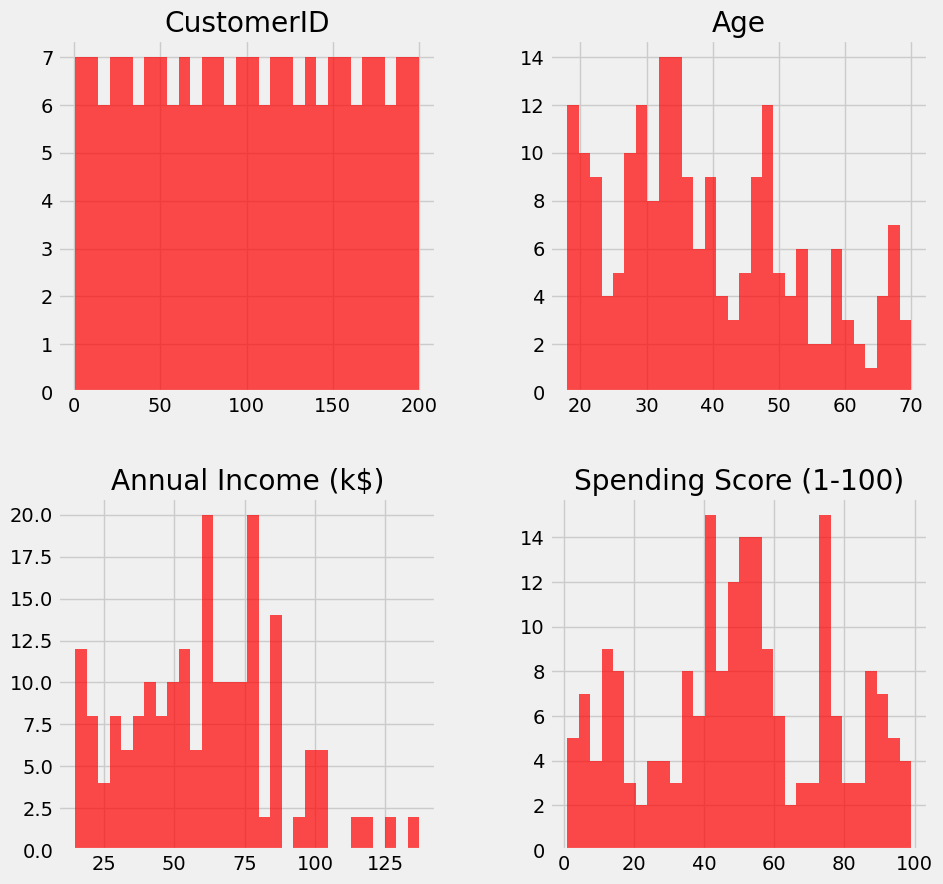

In [86]:
df.hist(figsize=(10, 10), bins=30, color='r', alpha=0.7)
plt.show()

<Axes: >

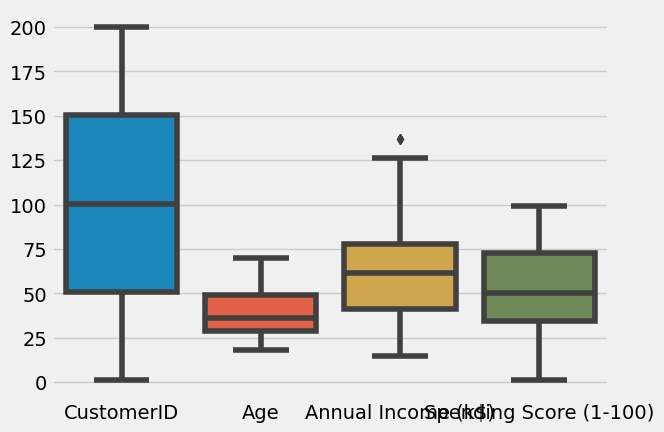

In [87]:
sns.boxplot(df)


In [28]:

plt.style.use('fivethirtyeight')

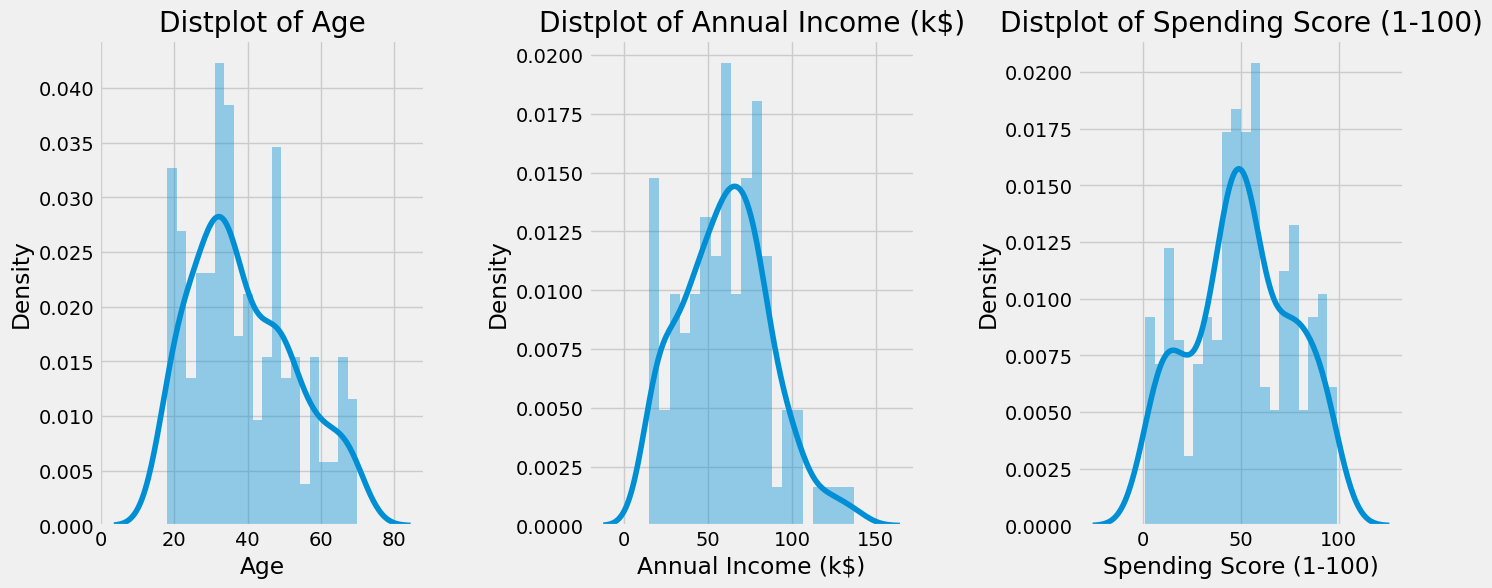

In [89]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [91]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the data from CSV file


# Select numerical columns to normalize or standardize
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Normalize the data using Min-Max scaling
min_max_scaler = MinMaxScaler()
data_normalized = df.copy()
data_normalized[numerical_cols] = min_max_scaler.fit_transform(df[numerical_cols])

# Standardize the data using z-score normalization
standard_scaler = StandardScaler()
data_standardized = df.copy()
data_standardized[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])

# Display the normalized and standardized data
print("Normalized Data:\n", data_normalized.head())
print("\nStandardized Data:\n", data_standardized.head())


Normalized Data:
    CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male  0.019231            0.000000                0.387755
1           2    Male  0.057692            0.000000                0.816327
2           3  Female  0.038462            0.008197                0.051020
3           4  Female  0.096154            0.008197                0.775510
4           5  Female  0.250000            0.016393                0.397959

Standardized Data:
    CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male -1.424569           -1.738999               -0.434801
1           2    Male -1.281035           -1.738999                1.195704
2           3  Female -1.352802           -1.700830               -1.715913
3           4  Female -1.137502           -1.700830                1.040418
4           5  Female -0.563369           -1.662660               -0.395980


# Count Plot of Gender

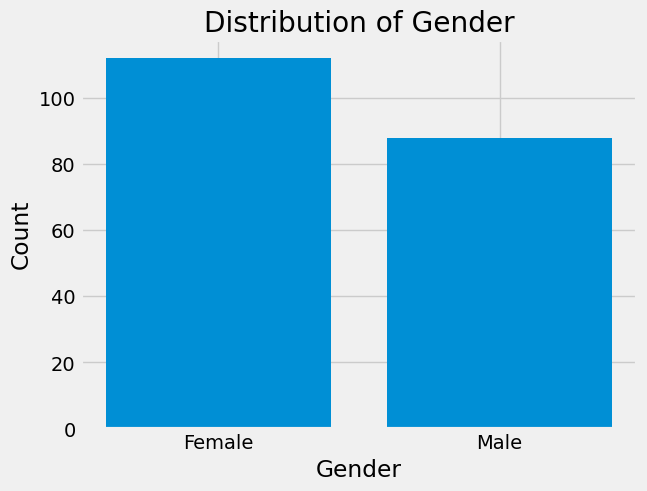

In [92]:
# Plot the distribution of Gender
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

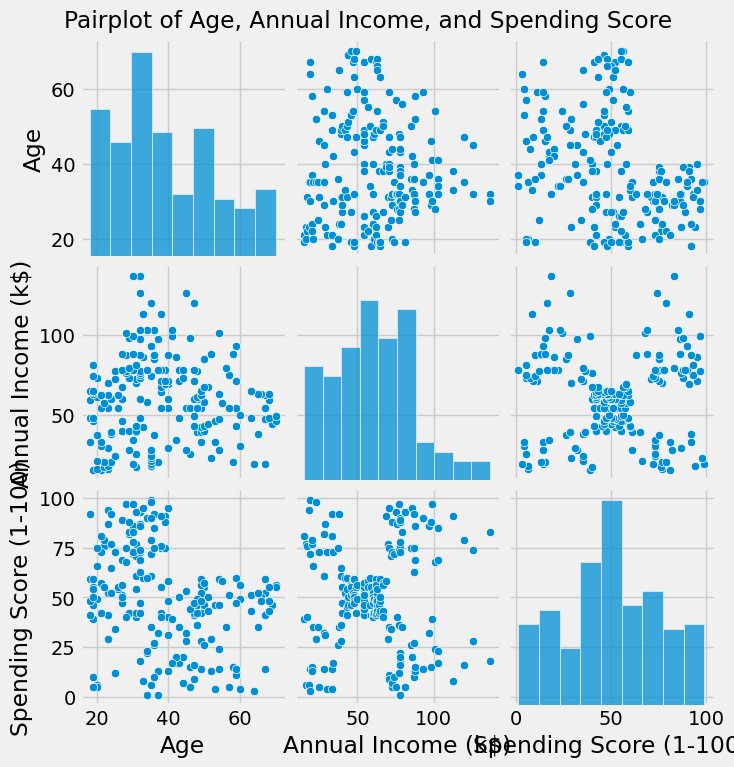

In [93]:
import seaborn as sns

# Pairplot
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.suptitle('Pairplot of Age, Annual Income, and Spending Score', y=1.02)
plt.show()


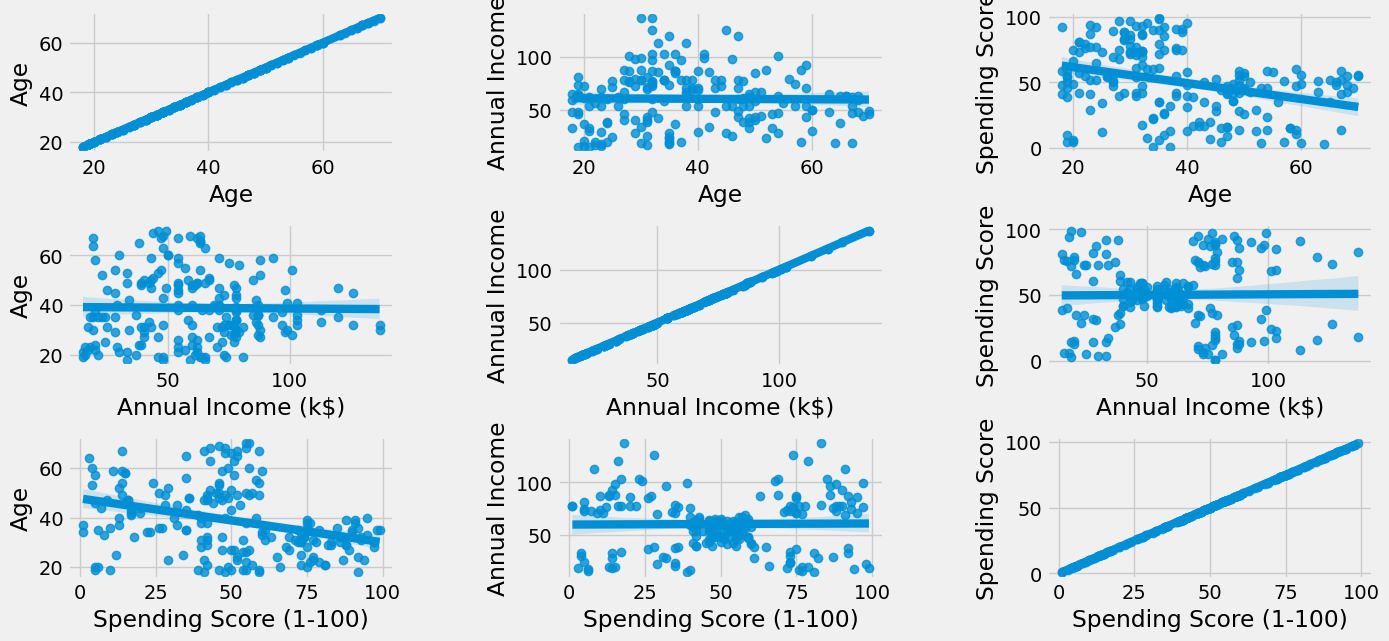

In [94]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

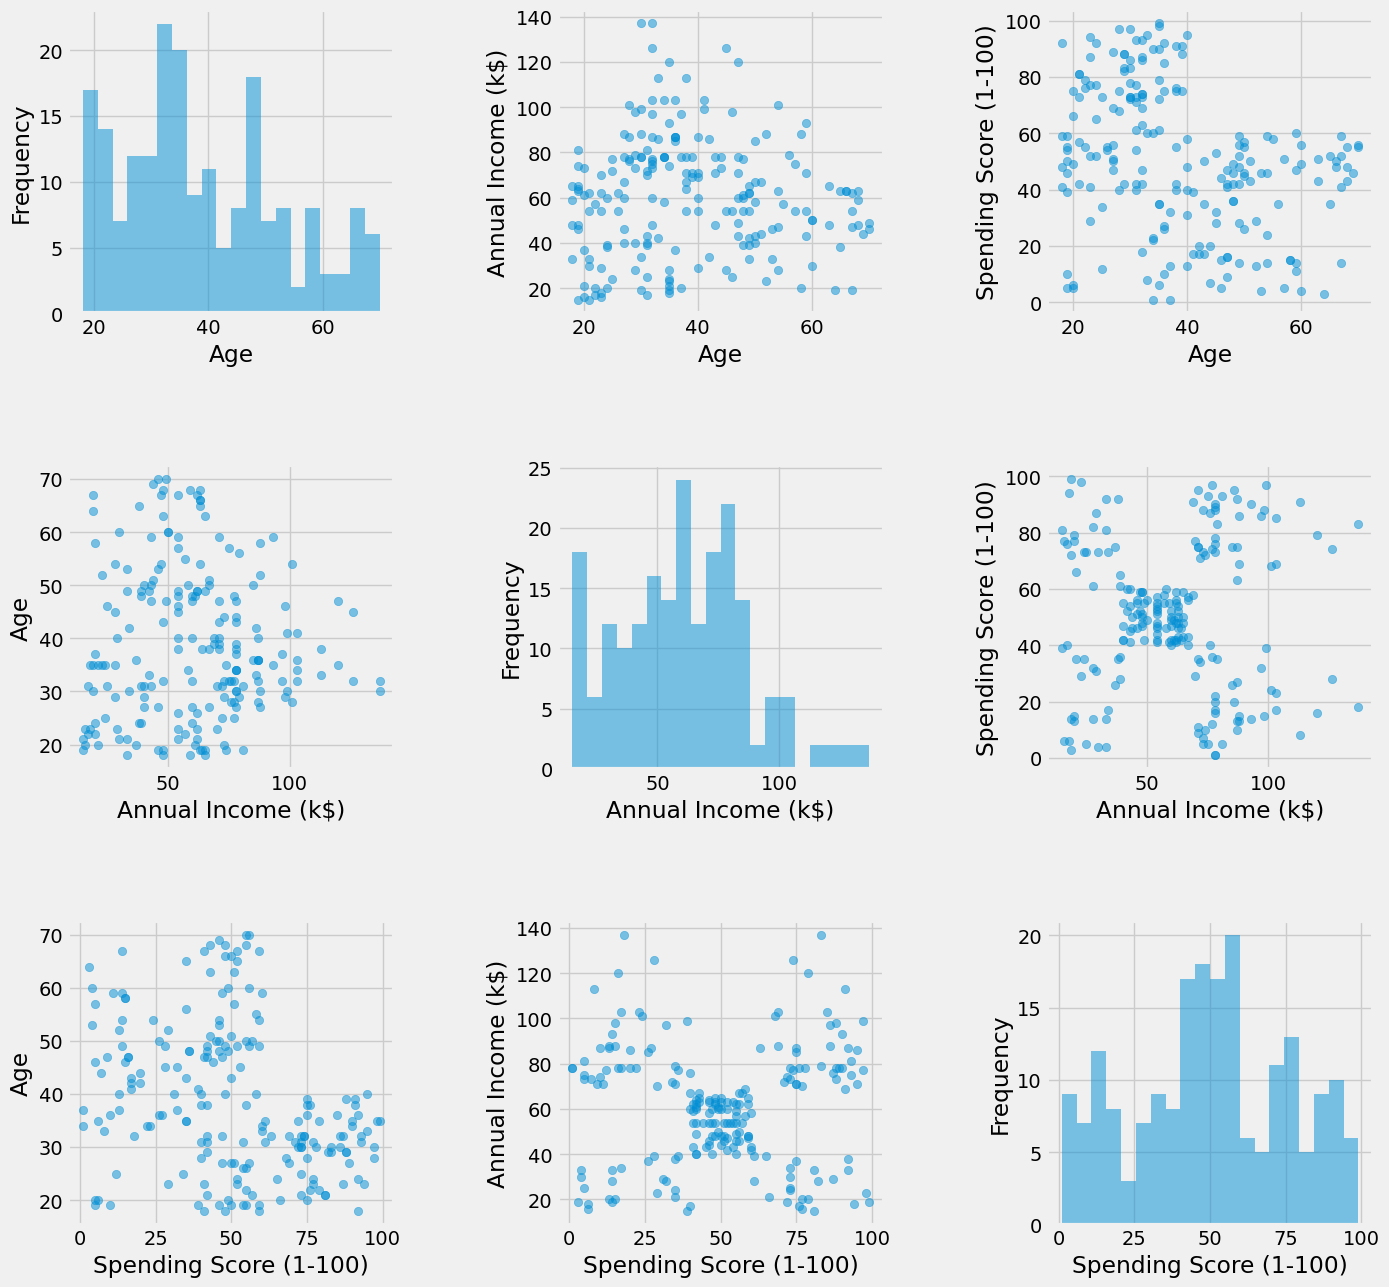

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV file


plt.figure(1, figsize=(15, 15))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        if x != y:
            plt.scatter(df[x], df[y], alpha=0.5)
            plt.xlabel(x)
            plt.ylabel(y)
        else:
            plt.hist(df[x], bins=20, alpha=0.5)
            plt.xlabel(x)
            plt.ylabel('Frequency')
plt.show()


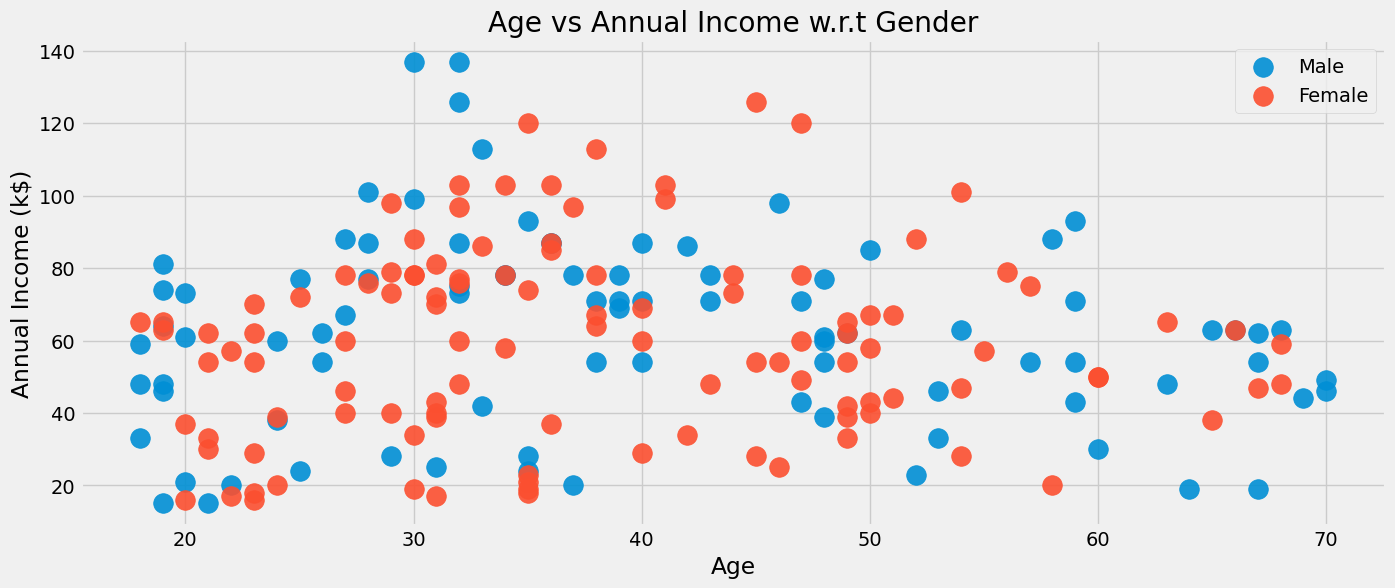

In [96]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.9 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

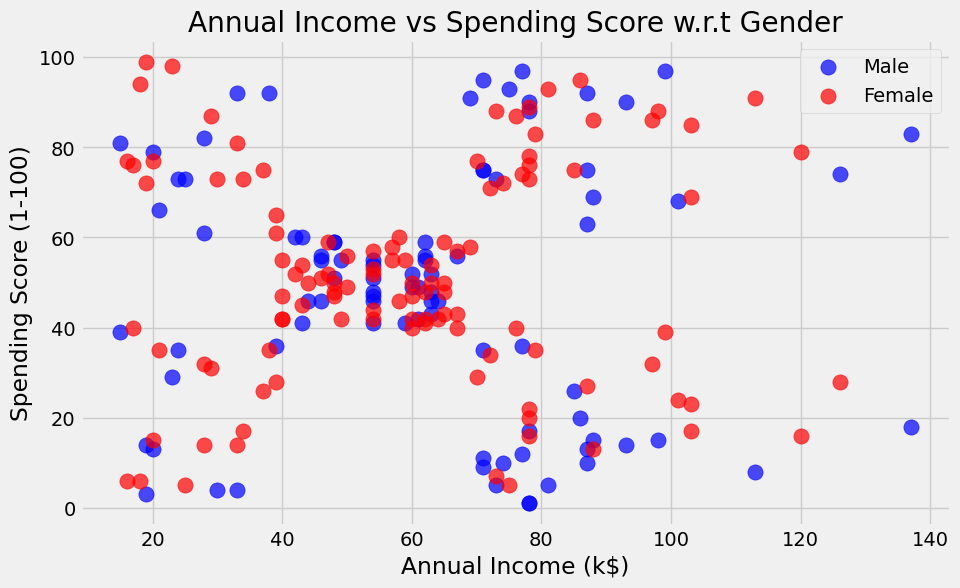

In [97]:
# Define colors for each gender
colors = {'Male': 'blue', 'Female': 'red'}

# Create the figure and set its size
plt.figure(figsize=(10, 6))

# Plot Annual Income vs Spending Score with respect to Gender
for gender in ['Male', 'Female']:
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df[df['Gender'] == gender],
                s=120, alpha=0.7, label=gender, color=colors[gender], marker='o')

# Set labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')

# Add legend
plt.legend()

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

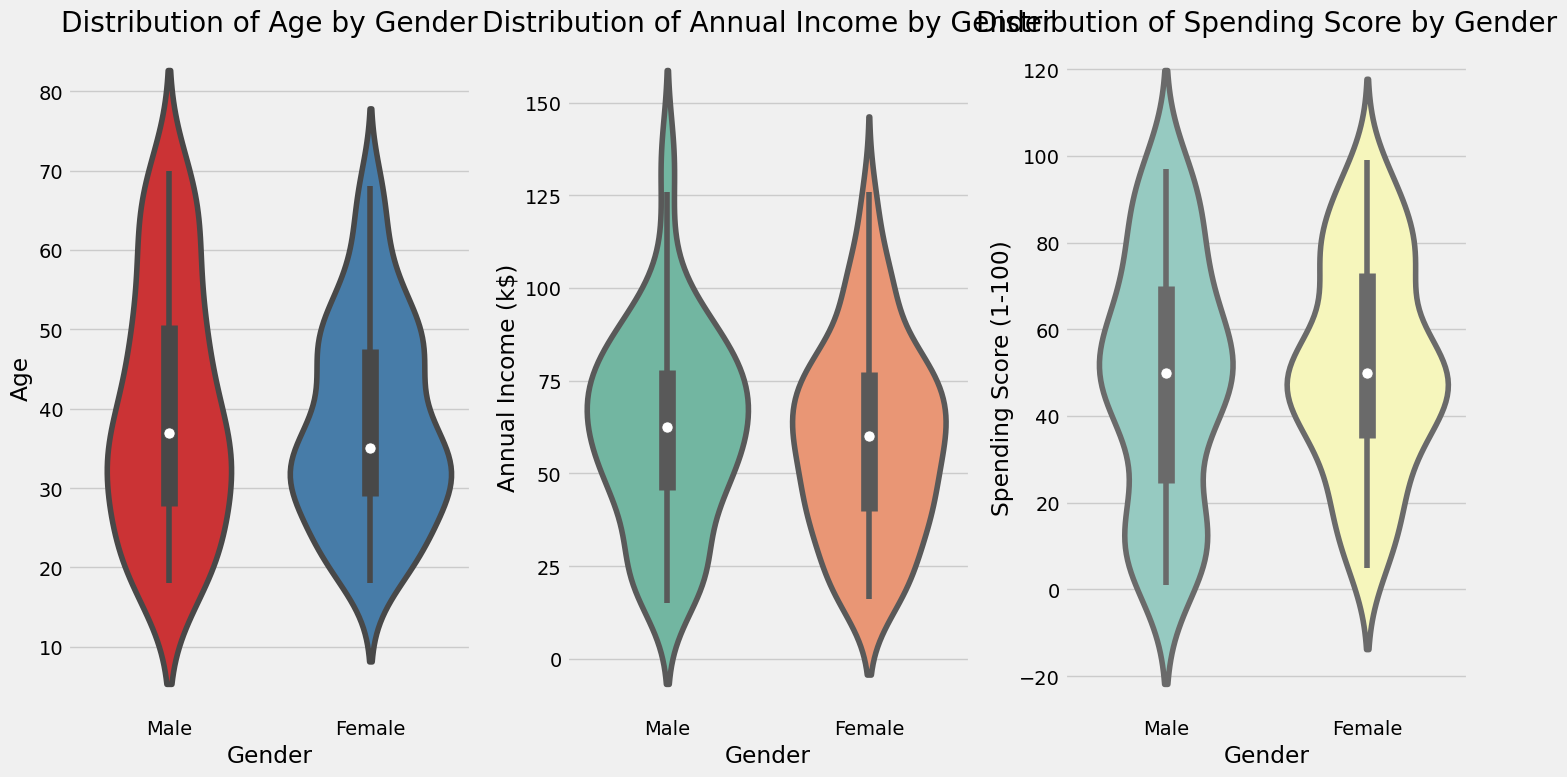

In [98]:
# Create violin plots for Age, Annual Income, and Spending Score according to Gender
plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
sns.violinplot(x='Gender', y='Age', data=df, palette='Set1')
plt.title('Distribution of Age by Gender')

plt.subplot(1, 3, 2)
sns.violinplot(x='Gender', y='Annual Income (k$)', data=df, palette='Set2')
plt.title('Distribution of Annual Income by Gender')

plt.subplot(1, 3, 3)
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set3')
plt.title('Distribution of Spending Score by Gender')

plt.tight_layout()
plt.show()

# Clustering using K- means

# 1.Segmentation using Age and Spending Score

In [99]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

# Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

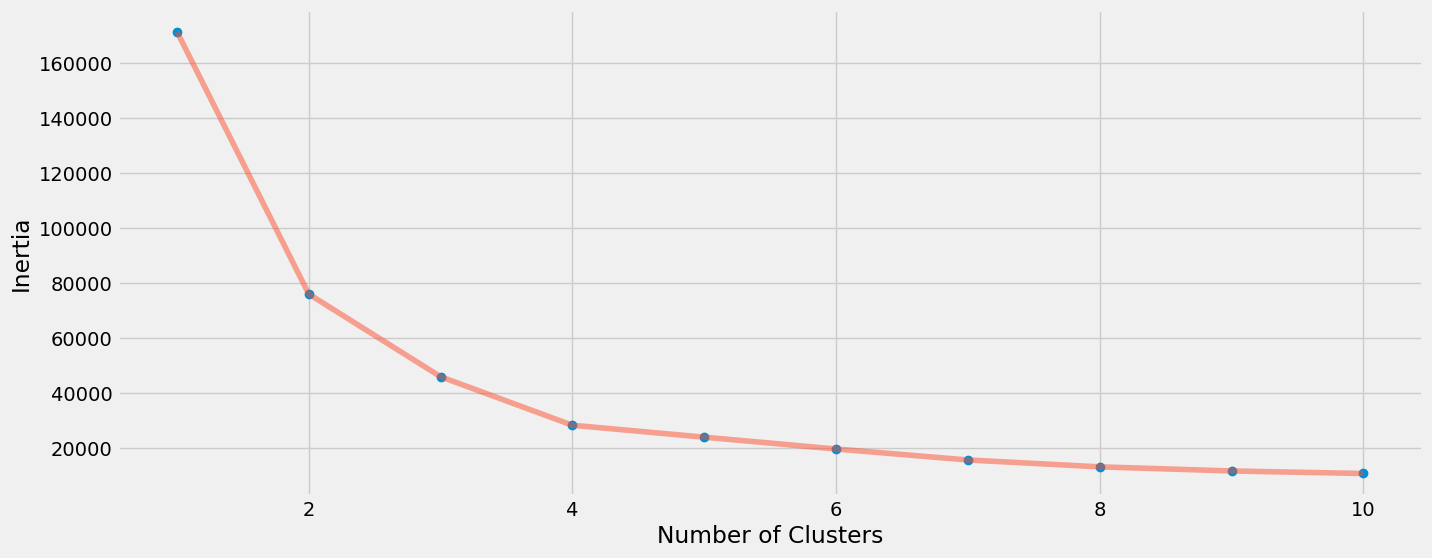

In [100]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [101]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [102]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

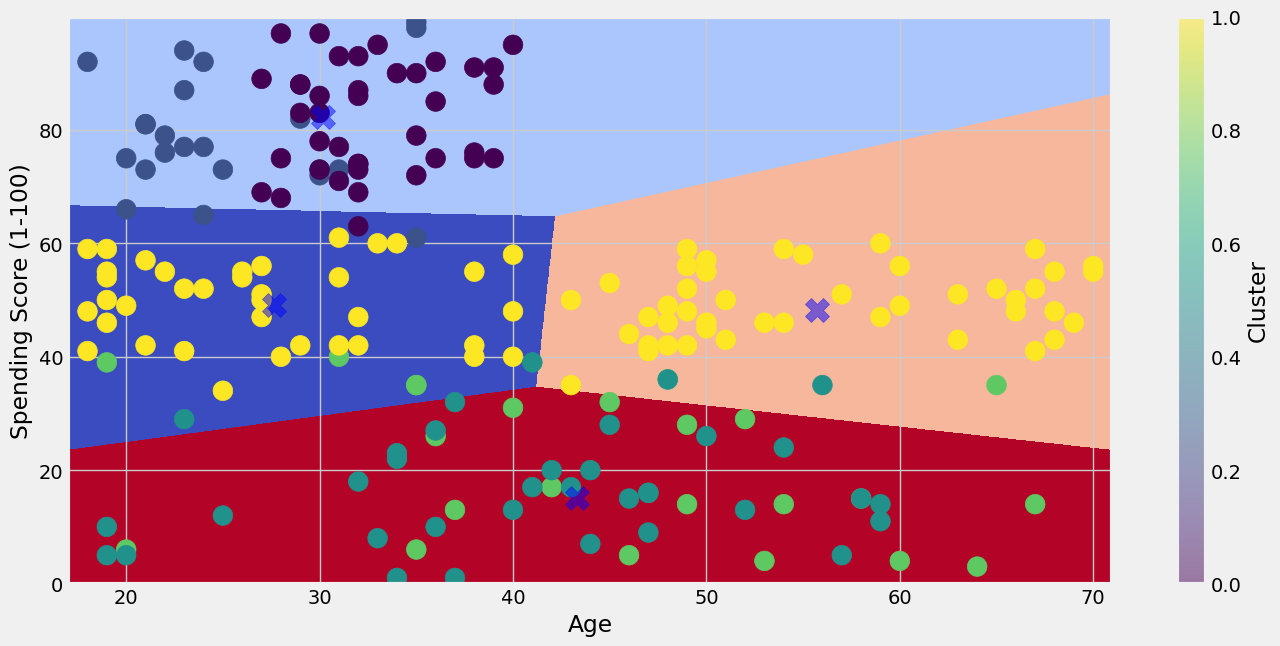

In [103]:
plt.figure(1, figsize=(15, 7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.coolwarm, aspect='auto', origin='lower')  # Change the colormap to coolwarm

# Scatter plot of data points
plt.scatter(x='Age', y='Spending Score (1-100)', data=df, c=labels2, s=200, cmap='viridis', marker='o')

# Scatter plot of centroids
plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='blue', alpha=0.5, marker='X')  # Change centroid color to blue

plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')

# Customize color bar
plt.colorbar(label='Cluster')

plt.show()


# 2. Segmentation using Annual Income and Spending Score

In [104]:

'''Annual Income and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

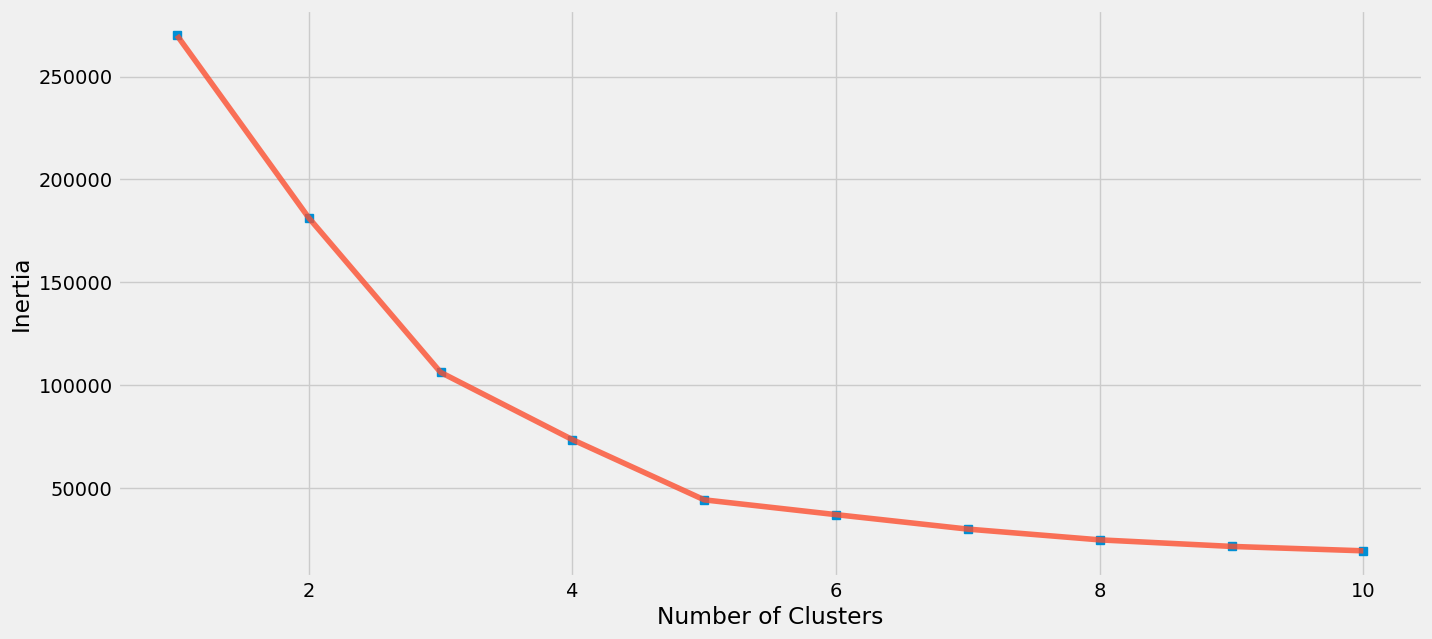

In [105]:
plt.figure(1 , figsize = (15 ,7))
plt.plot(np.arange(1 , 11) , inertia , 's')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.8)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [106]:

algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [107]:

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

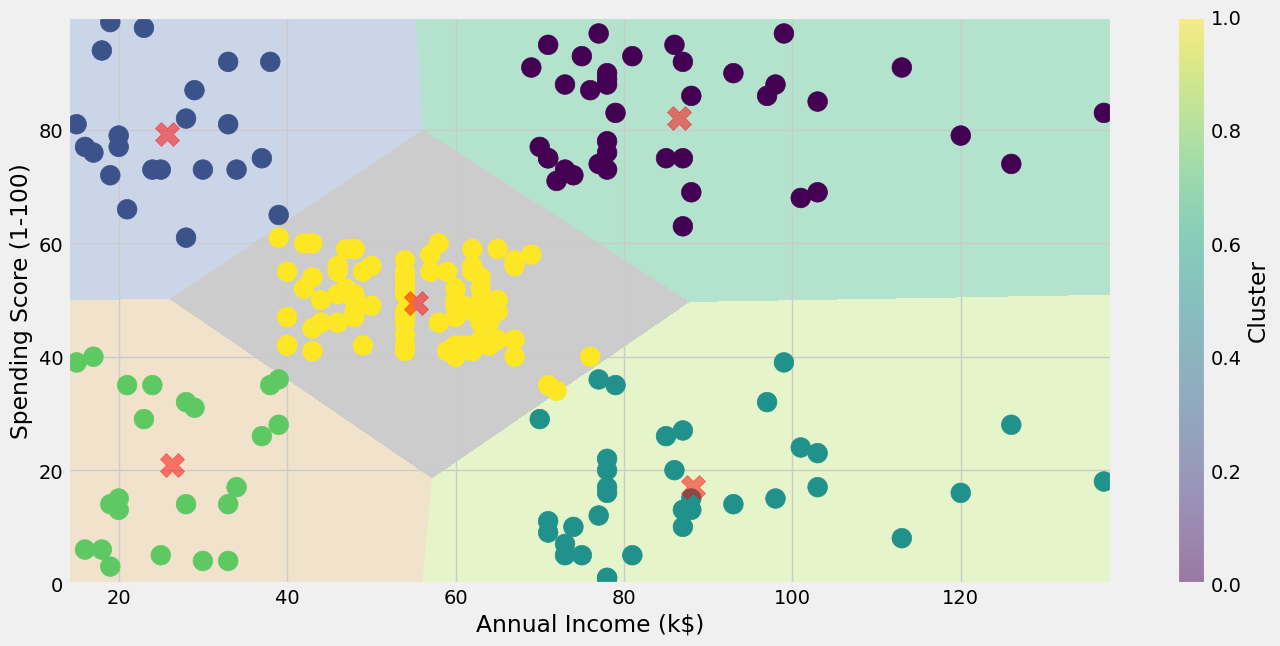

In [109]:
plt.figure(1, figsize=(15, 7))
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

# Scatter plot of data points
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=labels2, s=200, cmap='viridis', marker='o')

# Scatter plot of centroids
plt.scatter(x=centroids2[:, 0], y=centroids2[:, 1], s=300, c='red', alpha=0.5, marker='X')

plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')

# Customize color bar
plt.colorbar(label='Cluster')

plt.show()


# 3.Segmentation using Age , Annual Income and Spending Score

In [110]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

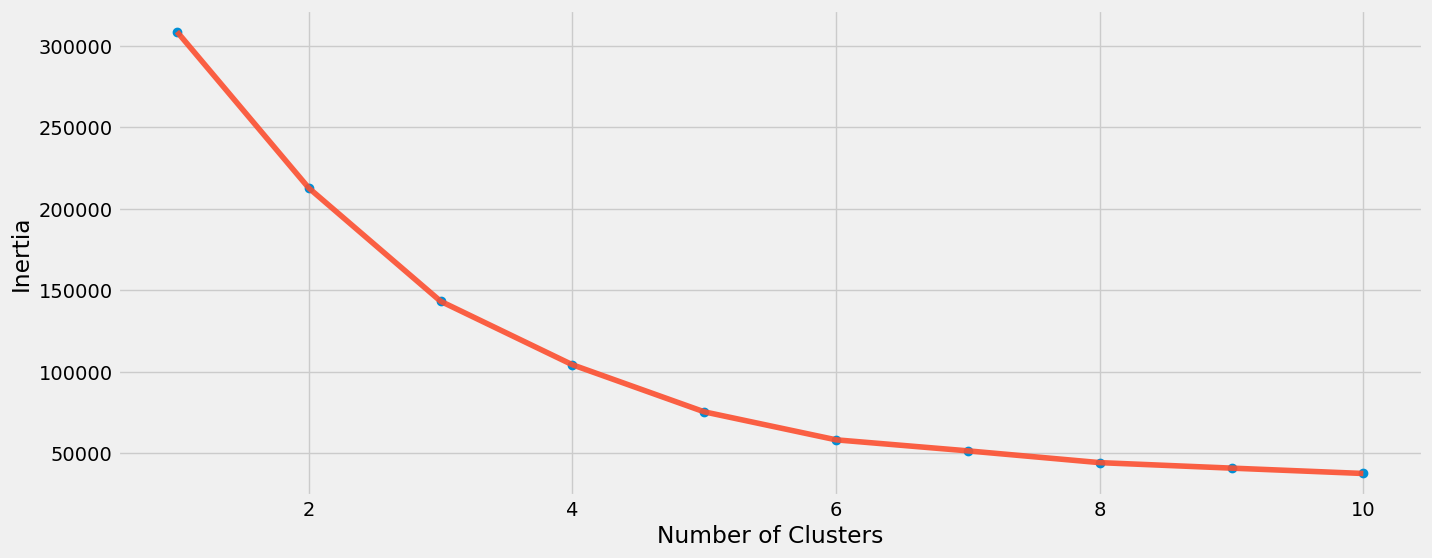

In [111]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.9)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [112]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [116]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [118]:

df.head(10)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  label3
0           1    Male   19                  15                      39       4
1           2    Male   21                  15                      81       5
2           3  Female   20                  16                       6       4
3           4  Female   23                  16                      77       5
4           5  Female   31                  17                      40       4
5           6  Female   22                  17                      76       5
6           7  Female   35                  18                       6       4
7           8  Female   23                  18                      94       5
8           9    Male   64                  19                       3       4
9          10  Female   30                  19                      72       5

In [119]:

X= df.iloc[:, [3,4]].values

# Building the Model

# KMeans Algorithm to decide the optimum cluster number , KMeans++ using Silhouette scores method

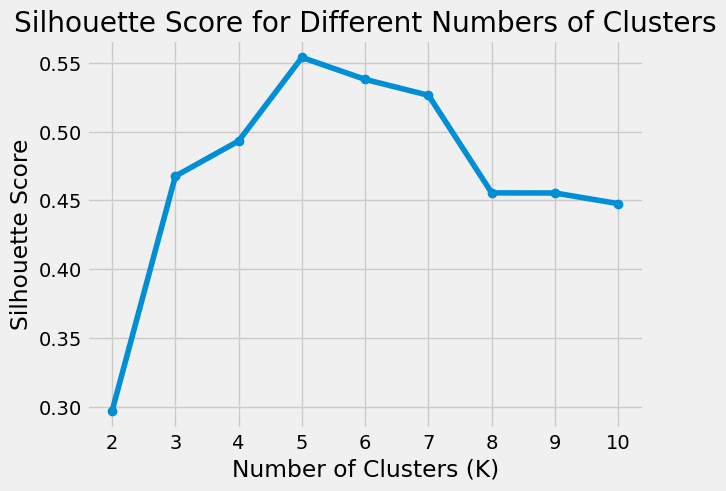

Optimal number of clusters (based on silhouette score): 5


In [126]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize a list to store silhouette scores
silhouette_scores = []

# Range of clusters to try
k_range = range(2, 11)

# Compute silhouette score for each value of K
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Choose the optimal number of clusters based on the highest silhouette score
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters (based on silhouette score): {optimal_k}')


In [129]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)


# Assigning Data Points to Clusters:


In [135]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming X contains your data points and kmeansmodel is your trained KMeans model

# Calculate distances between each data point and each centroid
distances = kmeansmodel.transform(X)  # Distance matrix where each row represents a data point and each column represents the distance to a centroid

# Assign each data point to the cluster with the nearest centroid
predicted_labels = np.argmin(distances, axis=1)  # Get the index of the column (centroid) with the minimum distance for each row (data point)

# Print the assigned cluster labels
print(predicted_labels)


[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


# Updating Cluster Centroids until convergence

In [136]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming X contains your data points and kmeansmodel is your trained KMeans model

# Set maximum number of iterations and convergence threshold
max_iterations = 100
convergence_threshold = 1e-4

# Initialize variables to track convergence
previous_centroids = kmeansmodel.cluster_centers_
converged = False
iteration = 0

# Repeat until convergence or maximum number of iterations is reached
while not converged and iteration < max_iterations:
    # Assign data points to clusters
    distances = kmeansmodel.transform(X)
    predicted_labels = np.argmin(distances, axis=1)

    # Update cluster centroids by calculating the mean of data points in each cluster
    new_centroids = np.array([X[predicted_labels == i].mean(axis=0) for i in range(kmeansmodel.n_clusters)])

    # Check for convergence
    if np.all(np.abs(new_centroids - previous_centroids) < convergence_threshold):
        converged = True
    else:
        # Update centroids and continue
        kmeansmodel.cluster_centers_ = new_centroids
        previous_centroids = new_centroids
        iteration += 1

# Print convergence information
if converged:
    print(f"Converged after {iteration + 1} iterations.")
else:
    print(f"Stopped after reaching maximum iterations ({max_iterations}).")

# Print final cluster centroids
print("Final cluster centroids:")
print(kmeansmodel.cluster_centers_)


Converged after 1 iterations.
Final cluster centroids:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


# Visualize the Clusters:

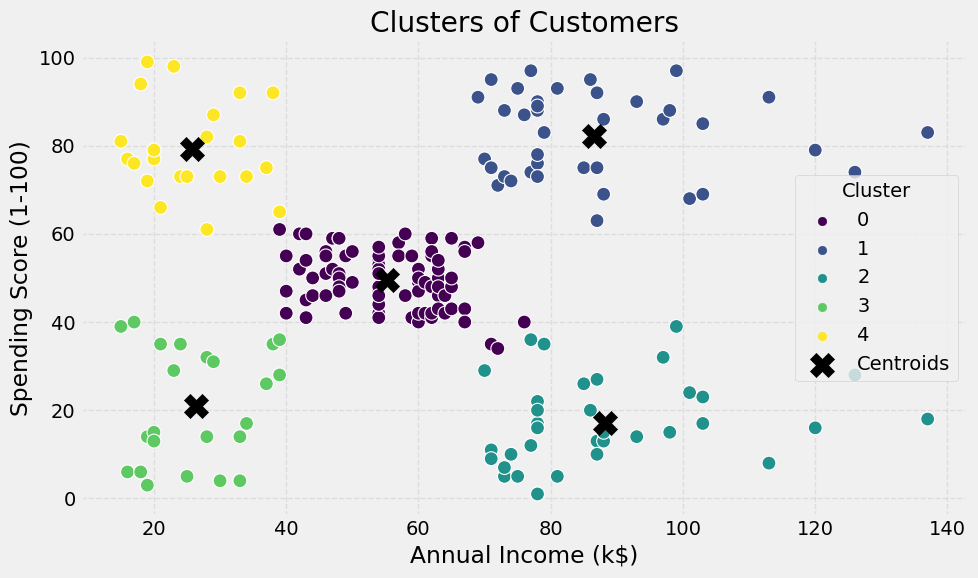

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X contains your data points and kmeansmodel is your trained KMeans model

# Assign data points to clusters
predicted_labels = kmeansmodel.predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predicted_labels, palette='viridis', legend='full', s=100)
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




# Analyze the characteristics of each cluster

In [139]:
# Analyze the characteristics of each cluster
cluster_df = pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
cluster_df['Cluster'] = predicted_labels
cluster_stats = cluster_df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'median', 'std'],
    'Spending Score (1-100)': ['mean', 'median', 'std'],
    'Cluster': 'size'
})
print(cluster_stats)

        Annual Income (k$)                   Spending Score (1-100)         \
                      mean median        std                   mean median   
Cluster                                                                      
0                55.296296   54.0   8.988109              49.518519   50.0   
1                86.538462   79.0  16.312485              82.128205   83.0   
2                88.200000   85.0  16.399067              17.114286   16.0   
3                26.304348   25.0   7.893811              20.913043   17.0   
4                25.727273   24.5   7.566731              79.363636   77.0   

                   Cluster  
               std    size  
Cluster                     
0         6.530909      81  
1         9.364489      39  
2         9.952154      35  
3        13.017167      23  
4        10.504174      22  
